<a href="https://colab.research.google.com/github/Suraj209211/PMOMEX---PREDICTIVE-MODEL-OF-MINERAL-EXPLORATION/blob/main/CNN_Model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DEVELOPMENT OF THE CNN**

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [23]:
file_path = '/content/drive/MyDrive/PREDICTIVE MODULE OF MINERAL EXPLORATION/PMOMEX---PREDICTIVE-MODEL-OF-MINERAL-EXPLORATION/NEW_DATA/CSV_OUTPUTS/Geophysical_data_training.csv'  # Change this to your file path
geospatial_data = pd.read_csv(file_path)

**FEATURE FOR THE DATA**

In [24]:
features = geospatial_data[['GravValue', 'MagneticValue']].values
labels = geospatial_data['Cu_Concentration'].values

**NORMALIZATION**

In [25]:
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


**RESHAPING THE DEVELOPMENT**

In [26]:
features_reshaped = features_normalized.reshape(-1, 1, 2, 1)

**DATA SPLITTING**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels, test_size=0.2, random_state=42)


**MODEL ARCHITECTURE**

In [30]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(1, 1), activation='relu', input_shape=(1, 2, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(1, 1)),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(1, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(1, 1)),
    Dropout(0.3),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='linear')  # For regression
])

**MODEL COMPILATION**

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

**EARLY STOPPING**

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

**Train the model**

In [35]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0945 - mae: 0.2301 - val_loss: 0.0589 - val_mae: 0.1761 - learning_rate: 0.0010
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0857 - mae: 0.2142 - val_loss: 0.0649 - val_mae: 0.2009 - learning_rate: 0.0010
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0886 - mae: 0.2208 - val_loss: 0.0517 - val_mae: 0.1461 - learning_rate: 0.0010
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0888 - mae: 0.2208 - val_loss: 0.0579 - val_mae: 0.1710 - learning_rate: 0.0010
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0810 - mae: 0.2074 - val_loss: 0.0555 - val_mae: 0.1662 - learning_rate: 0.0010
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0858 - mae: 0.2138 - val_loss: 0.0510 - val_mae: 0.1431 - learning_rate: 0.0010
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0767 - mae: 0.1952 - val_loss: 0.0535 - val_mae: 0.1597 - learning_rate: 0.0010

** **

**MODEL DATA EVALUATION**

In [37]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0275 - mae: 0.0926 
Test MAE: 0.09231498837471008


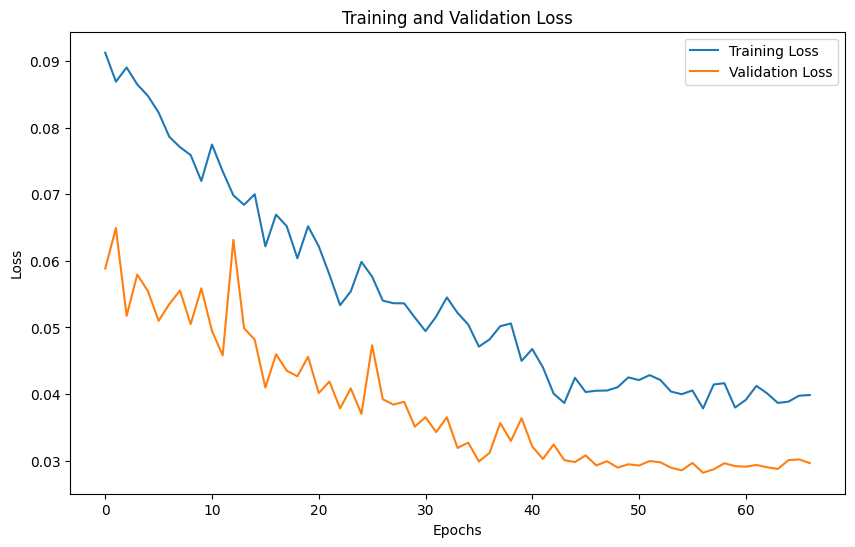

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [39]:
predictions = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [40]:
print(f"Predicted values: {predictions[:5]}")
print(f"Actual values: {y_test[:5]}")

Predicted values: [[0.9428415 ]
 [0.97307163]
 [0.96478397]
 [0.6854304 ]
 [0.02346651]]
Actual values: [1 1 1 1 0]


In [41]:
model.save('/content/drive/MyDrive/PREDICTIVE MODULE OF MINERAL EXPLORATION/PMOMEX---PREDICTIVE-MODEL-OF-MINERAL-EXPLORATION/CODE/MODEL/cnn_model.h5')